# Contenido <a id='back'></a>

* [Introducción](#intro) 
* [Etapa 1. Inicialización](inicializacion)
* [Etapa 2. Cargar los datos de datos](#cargar)
* [Etapa 3. Preparar los datos](#preparar)
    * [Companies](#companies)
    * [Trips](#trips)
    * [Viajes desde Loop hasta el Aeropuerto Internacional O'Hare](#viajes)
* [Etapa 4. Analizar los datos](#analizar)
* [Etapa 5. Comprobación de hipótesis estadísticas](#hipotesis)
    * [Hipótesis 1: ¿La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional
O'Hare no cambia los sábados lluviosos?](#hipotesis_1) 
* [Etapa 6. Conclusión general](#general)

# ¿La cantidad de viajes varían dependiendo de los factores climáticos?<a id='intro'></a>
Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos
que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información
disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los
factores externos en los viajes.


Este proyecto tiene como propósito identificar aquellos factores externos que pueden influir en el aumento o disminución de la cantidad de viajes que realicen cada una de las compañias de taxis disponibles en la ciudad de Chicago, se cuenta con información sobre las compañías de taxis en la ciudad, información sobre los viajes, así como también, las condiciones climáticas de cada viaje para poder verificar si esto influye directamente en el promedio de los viajes realizados.
Se van a tratar los valores ausentes, corregir los tipo de datos, analizar los datos limpios, probar algunas hipótesis para luego determinar las conclusiones del estudio.

## Inicialización <a id='inicializacion'></a>

In [44]:
# Cargar todas las librerías

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

## Cargar los datos <a id='cargar'></a>

In [45]:
# Carga los archivos de datos en diferentes DataFrames

companies= pd.read_csv('/datasets/project_sql_result_01.csv')
trips= pd.read_csv('/datasets/project_sql_result_04.csv')
trips_seg= pd.read_csv('/datasets/project_sql_result_07.csv')

## Preparar los datos <a id='preparar'></a>

### Companies <a id='companies'></a>

In [46]:
# Imprime la información general/resumen sobre el DataFrame de las conmpañias de taxis

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [47]:
# Imprime una muestra de los datos para las compañías de taxis

companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


El dataset companies contiene los siguientes campos:

- `company_name` — nombre de la empresa de taxis
- `trips_amount` — el número de viajes de cada compañía de taxis el 15 y 16 de
noviembre de 2017

Tenemos un conjunto de datos conformado por 2 columnas y 64 filas, no se necesita ajustar tipos de datos y tampoco tiene valores ausentes.

### Trips <a id='trips'></a>

In [48]:
# Imprime la información general/resumen sobre el DataFrame de los viajes

trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [49]:
# Imprime una muestra de los datos para los viajes

trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


El dataset companies contiene los siguientes campos:

- `dropoff_location_name` — barrios de Chicago donde finalizaron los viajes
- `average_trips` — el promedio de viajes que terminaron en cada barrio en
noviembre de 2017

Tenemos un conjunto de datos conformado por 2 columnas y 94 filas, no se necesita ajustar tipos de datos y tampoco tiene valores ausentes.

### Viajes desde Loop hasta el Aeropuerto Internacional O'Hare <a id='viajes'></a>

In [50]:
# Imprime la información general/resumen sobre el DataFrame
# de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare 

trips_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [51]:
# Imprime una muestra de los datos para los viajes segmentado

trips_seg.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


El dataset trip_seg contiene los siguientes campos:

- `start_ts` — fecha y hora de recogida
- `weather_conditions` — condiciones climáticas en el momento en el que comenzó el
viaje
- `duration_seconds` —  duración del viaje en segundos

Tenemos un conjunto de datos conformado por 3 columnas y 1068 filas, se necesita ajustar tipos de datos de la columna start_ts y no tiene valores ausentes.

Se procede a corregir el tipo de dato de la columna start_ts al tipo DateTime y a verificar si la variable duration_seconds tiene valores atípicos que puedan afectar el análisis.

In [52]:
# cambiar tipo de datos
trips_seg['start_ts'] = pd.to_datetime(trips_seg['start_ts'], format='%Y-%m-%d %H:%M:%S')

# actualizar información general
trips_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [53]:
trips_seg['duration_seconds'].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

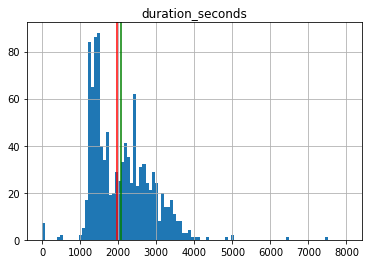

In [54]:
# histograma de la variable duration_seconds para verificar el sesgo de los datos 

trips_seg.hist('duration_seconds', bins=100,range= (0,8000))
plt.axvline(2071.731273,0,10000,color='green')
plt.axvline(1980.000000,0,10000,color='red')
plt.show()

Se puede observar en el gráfico que el conjunto de datos tiene algunos valores muy altos que están alejados del bloque principal, estos de consideran atípicos, a su vez genera que la media(línea color verde) esté alejada y sea mayor que la mediana(línea color rojo) por lo que se puede concluir que los datos están sesgados a la derecha, por lo que se utilizará la mediana para el análisis posterior de los datos.

## Analizar los datos <a id='analizar'></a>

In [55]:
# principales barrios en términos de finalización del recorrido

count_trips=trips.sort_values(by='average_trips', ascending=False)
count_trips= count_trips[:10].set_index('dropoff_location_name')
count_trips

,average_trips
dropoff_location_name,
Loop,10727.466667
River North,9523.666667
Streeterville,6664.666667
West Loop,5163.666667
O'Hare,2546.900000
Lake View,2420.966667
Grant Park,2068.533333
Museum Campus,1510.000000
Gold Coast,1364.233333


Se pudo identificar que los principales barrios en términos de finalización de recorridos en orden de mayor a menor son los siguientes: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Museum Campus, Gold Coast, Sheffield & DePaul.    

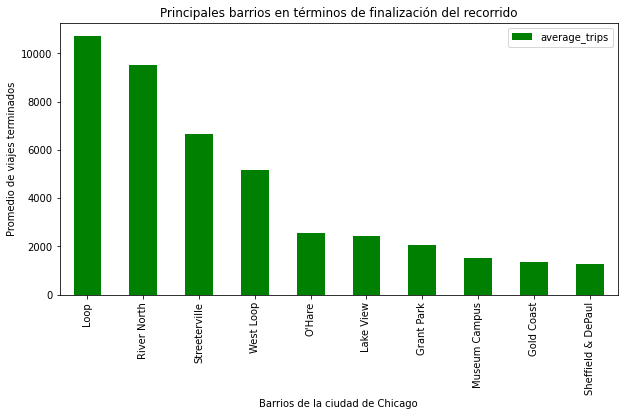

In [56]:
# Grafica principales barrios en términos de finalización del recorrido

count_trips.plot(kind='bar',title='Principales barrios en términos de finalización del recorrido',color='green',
                               figsize=(10,5))
plt.ylabel('Promedio de viajes terminados')
plt.xlabel('Barrios de la ciudad de Chicago')
plt.show()

Durante el mes de noviembre de 2017 el barrio que tienen el mejor promedio en cuento a finalización de recorridos es Loop con un promedio mayor a los 10.000 viajes completados, seguido de cerca por el barrio River North, mientras que en los últimos lugares del top 10 tenemos a los barrios Museum Campus, Gold Coast y Sheffield & DePaul, todos por debajo de los 2000 viajes completados, número bastante menor al barrio Loop que es el mas solicitado. 

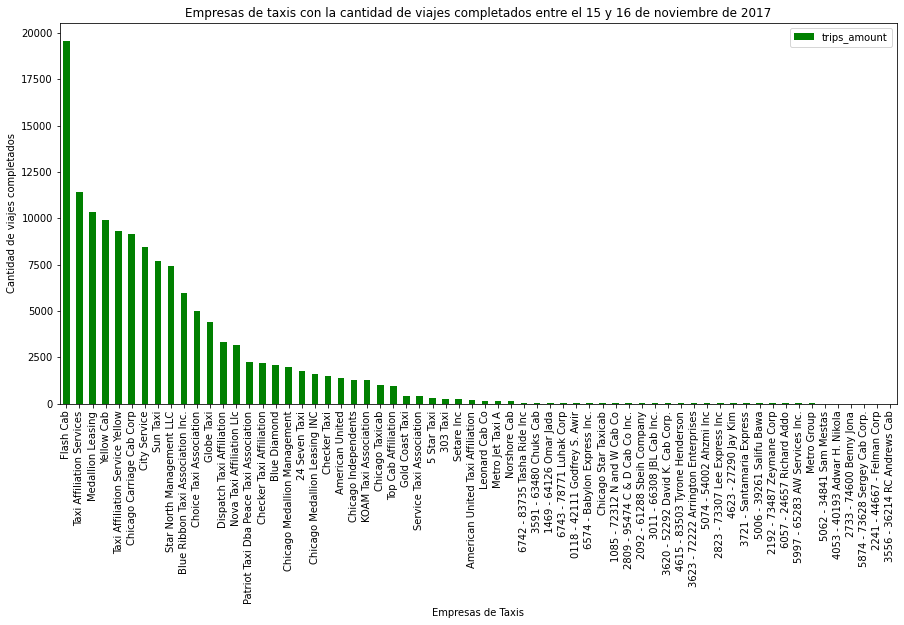

In [57]:
# Grafica Empresas de taxis con sus números de viajes
companies_count= companies.set_index('company_name')
companies_count.plot(kind='bar',title='Empresas de taxis con la cantidad de viajes completados entre el 15 y 16 de noviembre de 2017',color='green',
                              figsize=(15,7))
plt.ylabel('Cantidad de viajes completados')
plt.xlabel('Empresas de Taxis')
plt.show()

Se cuenta con la información de 64 compañías de taxis de la ciudad de Chicago y la cantidad de viajes realizados los días 15 y 16 de noviembre de 2017 y se pudo determinar que la compañía mas popular fue Flash Cab con casi 20.000 viajes completados, la compañía que ocupa el segundo lugar es Taxi Affiation Services con aproximadamente unos 11000 viajes, muy por debajo de Flash Cab, en tercer lugar está Medallion Leasing, luego tenemos 11 compañias entre los 2500 y 10.000 viajes, todas las demás están por debajo de los 2500 viajes. 

## Probar las hipótesis estadísticas. <a id='hipotesis'></a>

**Hipótesis 1** <a id='hipotesis_1'></a>

- H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional
O'Hare no cambia los sábados lluviosos
- Ha: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional
O'Hare cambia los sábados lluviosos
- alpha = 0.05 nivel crítico de significación estadística

In [58]:
# Prueba las hipótesis
sub_hip_bad= trips_seg.query('weather_conditions == "Bad"')
sub_hip_bad= sub_hip_bad['duration_seconds']
sub_hip_good= trips_seg.query('weather_conditions == "Good"')
sub_hip_good= sub_hip_good['duration_seconds']

print('Mediana cuando los sábados no son lluviosos:', pd.Series(sub_hip_good).median())
print('Mediana cuando los sábados son lluviosos:', pd.Series(sub_hip_bad).median())

# promedio cuando los sabádos no son lluviosos 
sub_hip_good = 1800.0

alpha = 0.05

results = st.ttest_1samp(sub_hip_bad, sub_hip_good)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 


Mediana cuando los sábados no son lluviosos: 1800.0
Mediana cuando los sábados son lluviosos: 2540.0
p-value:  9.416472602540515e-24
Rechazamos la hipótesis nula


Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, para rechazar la hipótesis nula. Por lo tanto, podemos concluir que el promedio de viajes cambia cuando los sabados son lluviosos.

## Conclusiones generales <a id='general'></a>

El estudio se basó en la información contenida en tres datasets que contenían información sobre las compañías de taxis de la cidad de Chicago, información sobre los viajes enfocandonos especialmente en los barrios de finalización de recorrido para determinar los barrios más populares y por ultimo un dataset con las condiciones climáticas durante los viajes, la fecha de estos registros datan de noviembre de 2017.  

Los datos no presentaban problemas significativos, no contaban con valores ausentes y solo se necesitó ajustar el tipo de dato de la columna start_ts al tipo DateTime del dataset trips_seg que contiene la información de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare detallando las condiciones climáticas por hora y se determinó que los datos de la variable duration_seconds estaban sesgados a la derecha por lo que se concluyó utilizar la mediana para la verificación de la hipótesis. 

**A partir de este conjunto de datos se puede concluir lo siguiente:**

- Durante el mes de noviembre de 2017 el barrio que tienen el mejor promedio en cuento a finalización de recorridos es Loop con un promedio mayor a los 10.000 viajes completados, seguido de cerca por el barrio River North, mientras que en los últimos lugares del top 10 tenemos a los barrios Museum Campus, Gold Coast y Sheffield & DePaul, todos por debajo de los 2000 viajes completados, número bastante menor al barrio Loop que es el mas solicitado. 

- Se cuenta con la información de 64 compañías de taxis de la ciudad de Chicago y la cantidad de viajes realizados los días 15 y 16 de noviembre de 2017 y se pudo determinar que la compañía mas popular fue Flash Cab con casi 20.000 viajes completados, la compañía que ocupa el segundo lugar es Taxi Affiation Services con aproximadamente unos 11000 viajes, muy por debajo de Flash Cab, en tercer lugar está Medallion Leasing, luego tenemos 11 compañias entre los 2500 y 10.000 viajes, todas las demás están por debajo de los 2500 viajes.

**Se formuló la siguiente hipótesis estadística:** 


**Hipótesis 1**

  H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos
  Ha: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos
  alpha = 0.05 nivel crítico de significación estadística
  
Se realizó la prueba T-TEST con el método scipy.stats.ttest_1samp(array1, interested_value) paara probar la hipótesis sobre la media de la población igualando a un valor dado, donde interested_value es la media propuesta para la prueba.

Se concluyó lo siguiente:

Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, para rechazar la hipótesis nula. Por lo tanto, podemos concluir que el promedio de viajes cambia cuando los sabados son lluviosos.
